# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

> Again, **don't use ChatGPT for this assignment.** You should be able to memorize the most basic parts of pandas.

## 0) Setup

Import pandas **with the correct name** .

In [75]:
import pandas as pd
!pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*. You *might* need to do `Kernel > Restart Kernel...` and run the notebook again from the top in order to get it to work.

In [91]:
df = pandas.read_excel("richpeople.xlsx")
pd.set_option('display.max_columns', None) 
df

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,industry,IndustryAggregates,region,north,politicalconnection,founder,generationofinheritance,sector,company,companytype,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,Media,Non-Traded Sectors,North America,1,NaN,0,0,media,Univision,aquired,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,"Retail, Restaurant",Non-Traded Sectors,Middle East/North Africa,0,NaN,0,inherited from father,trading,Al-Futtaim Group,new,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
2,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,Diversified financial,Financial,Middle East/North Africa,0,NaN,0,inherited from father,industrial goods,Al-Ghurair Group,new,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,Money Management,Financial,Middle East/North Africa,0,NaN,1,0,Banking,Al Rajhi bank,new,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,Consumer,Traded Sectors,Sub-Saharan Africa,0,NaN,1,0,"sugar, flour, cement",BUA Group,new,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,2014,Zhu Yicai,1154,China,CHN,1.5,self-made,self-made finance,male,49.0,Diversified financial,Financial,East Asia,0,NaN,1,0,meat products,Yurun Food,new,founder,1993.0,NaN,diversified,NaN,NaN,http://www.forbes.com/profile/zhu-yicai/,NaN,NaN,NaN
1649,2014,Ziyad Manasir,609,Russia,RUS,2.8,self-made,privatized and resources,male,48.0,Constrution,Non-Traded Sectors,Europe,0,1.0,1,0,construction,Stroygazconsulting,new,founder,1992.0,NaN,construction,close ties with Gazprom,NaN,http://www.forbes.com/profile/ziyad-manasir/,http://www.themoscowtimes.com/business/article...,NaN,NaN
1650,2014,Ziyaudin Magomedov,1372,Russia,RUS,1.2,self-made,privatized and resources,male,45.0,Energy,Resource Related,Europe,0,NaN,1,0,"ports, gas",Summa Group,new,founder,2004.0,NaN,"port, gas",NaN,NaN,http://www.summagroup.ru/about/history/en/,http://www.forbes.com/profile/ziyaudin-magomedov/,NaN,NaN
1651,2014,Zong Qinghou,94,China,CHN,11.6,self-made,founder non-finance,male,68.0,Consumer,Traded Sectors,East Asia,0,NaN,1,0,beverages,Hangzhou Wahaha Group,new,founder,1987.0,NaN,beverages,NaN,NaN,http://en.wikipedia.org/wiki/Zong_Qinghou,http://mic.com/articles/39659/zong-qinghou-chi...,NaN,NaN


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  
 14  politicalconnection     

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [78]:
richie_rich = df["networthusbillion"].sort_values(ascending=False).head(10)
richie_rich

184     76.0
226     72.0
79      64.0
1562    58.2
862     48.0
339     40.0
247     40.0
1364    38.0
280     36.7
724     34.7
Name: networthusbillion, dtype: float64

## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** This is not a `.groupby`

In [79]:
male_billionares = df["gender"] == "female"
male_billionares.sum()

np.int64(180)

In [80]:
female_billionares = df["gender"] == "female"
female_billionares.sum()

np.int64(180)

In [81]:
difference = male_billionares.sum() - female_billionares.sum()
print("There are", difference, "more male billionares than female billionares. SMASH PATRIARCHY AND GENDER/WEALTH INEQUALITY")

There are 0 more male billionares than female billionares. SMASH PATRIARCHY AND GENDER/WEALTH INEQUALITY


## 4b) What percent is that?

> **TIP:** Doing percentages with the answer to `4a` is so common that there's an extra parameter to automatically calculate it. Look at the documentation!

In [82]:
difference = male_billionares.sum() - female_billionares.sum()
percentage =  (difference/1653)*100
percentage.round(2)

print("That's", percentage.round(2), "times more male billionares than female billionares.")

That's 0.0 times more male billionares than female billionares.


## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

> **TIP:** This one *does* use `.groupby`. You can pick what 'average' means in this context.

In [83]:
female_billionares = df[df["gender"] == "female"]
female_billionares

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
5,2014,Abigail Johnson,50,United States,USA,17.3,inherited,inherited,female,52.0,...,relation,1946.0,NaN,money management,3rd generation,no male siblings,"http://en.wikipedia.org/wiki/Edward_Johnson,_III",https://www.fidelity.com/about-fidelity/our-he...,NaN,NaN
9,2014,Aerin Lauder Zinterhofer,1465,United States,USA,1.1,inherited,inherited,female,44.0,...,relation,1946.0,NaN,"inherited, cosmetics",3rd generation,NaN,http://en.wikipedia.org/wiki/Jane_Lauder,http://investing.businessweek.com/research/sto...,NaN,NaN
12,2014,Ahsen Ozokur,1143,Turkey,TUR,1.6,inherited,inherited,female,63.0,...,relation,1944.0,NaN,food manufacturing,inherited from father,shareholder,http://en.wikipedia.org/wiki/%C3%9Clker,http://www.yildizholding.com.tr/tr/hakkimizda,NaN,NaN
52,2014,Alexandra Schorghuber,609,Germany,DEU,2.8,inherited,inherited,female,55.0,...,relation,1954.0,NaN,real estate,widow,NaN,http://de.wikipedia.org/wiki/Sch%C3%B6rghuber_...,http://de.wikipedia.org/wiki/Alexandra_Sch%C3%...,http://www.sug-munich.com/de/unternehmensgrupp...,NaN
67,2014,Alice Walton,13,United States,USA,34.3,inherited,inherited,female,64.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/nancy-walton-lau...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,2014,Xiu Li Hawken,1372,United Kingdom,GBR,1.2,self-made,self-made finance,female,51.0,...,owner,2007.0,NaN,real estate,NaN,NaN,http://www.forbes.com/profile/xiu-li-hawken/,http://investing.businessweek.com/research/sto...,NaN,NaN
1607,2014,Yang Huiyan,196,China,CHN,6.9,inherited,inherited,female,32.0,...,relation,1997.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Yang_Huiyan,NaN,NaN,NaN
1618,2014,Yoshiko Mori,1210,Japan,JPN,1.4,inherited,inherited,female,73.0,...,relation,1959.0,NaN,"inherited, Mori Building",widow,NaN,http://www.forbes.com/profile/yoshiko-mori/,NaN,NaN,NaN
1627,2014,Yvonne Bauer,446,Germany,DEU,3.5,inherited,inherited,female,36.0,...,relation,1875.0,NaN,media,5th generation,"chairman, three sisters have 5% ownership in c...",http://www.forbes.com/profile/yvonne-bauer/,http://en.wikipedia.org/wiki/Bauer_Media_Group,NaN,NaN


In [84]:
df.groupby('gender')['networthusbillion'].mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

In [85]:
print("The average wealth for male and female billionares is almost same")

The average wealth for male and female billionares is almost same


## 5a) What is the most common source/type of wealth?

In [86]:
type_of_wealth = df["typeofwealth"].value_counts(ascending = False)
type_of_wealth

typeofwealth
inherited                   506
founder non-finance         467
self-made finance           344
privatized and resources    192
executive                   142
Name: count, dtype: int64

In [87]:
print("Inherited is the most common type of wealth.")

Inherited is the most common type of wealth.


## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together??? You could also do this as two separate cells where you calculate it separately for men and women.
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [88]:
type_of_wealth_male = df.groupby("gender")["typeofwealth"].value_counts(ascending = False)
type_of_wealth_male

gender  typeofwealth            
female  inherited                   142
        founder non-finance          21
        executive                     6
        self-made finance             6
        privatized and resources      5
male    founder non-finance         446
        inherited                   364
        self-made finance           338
        privatized and resources    187
        executive                   136
Name: count, dtype: int64

In [89]:
print("The most common type of wealth for men is founder non-finance and for women is inherited and these are different.")

The most common type of wealth for men is founder non-finance and for women is inherited and these are different.


## 6a) What companies have the most billionaires? Let's see the top five.

> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.

In [137]:
companies = df["company"].value_counts().head(5)
companies

company
Hyatt                  11
Oetker-Gruppe           8
S. C. Johnson & Son     7
Alfa Group              6
Votorantim Group        6
Name: count, dtype: int64

### 6b) Graph those top 5 as a horizontal bar graph. Make the largest bar be at the top of the graph.

> **TIP:** Just try to throw `.plot()` on the end??
> 
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

<Axes: ylabel='company'>

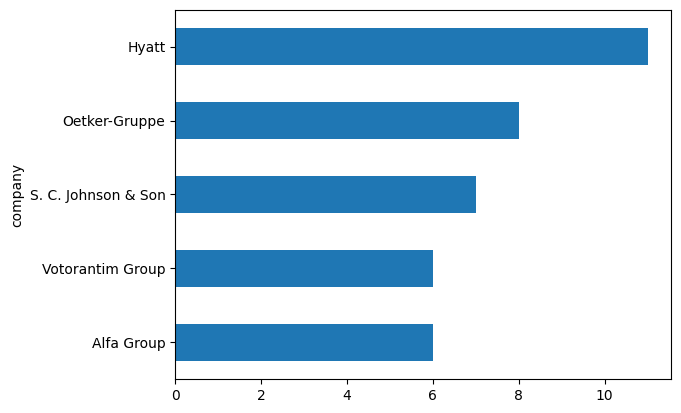

In [138]:
companies.sort_values().plot(kind='barh')

## 7) How much money do these top 5 billionaires have in total?

> **TIP:** for multiple conditions, you can't use `or` and `and`. In pandas, `|` means *or* and `&` means *and*.
>
> **TIP:** Checking multiple conditions can be done two ways.
> - `(df['colname'] == 'A') | (df['colname'] == 'B')`
> - `df['colname'].isin(['A', 'B'])`

In [140]:
top_networth = df.sort_values("networthusbillion", ascending=False).head(5)
total_networth = top_networth["networthusbillion"].sum()
total_networth


np.float64(318.2)

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [141]:
top_10 = df.groupby("countrycode")["networthusbillion"].sum() 
top_10 = top_10.sort_values(ascending=False).head(10)
top_10

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64

## 9a) How old is an average billionaire?

In [143]:
df["age"].mean()

np.float64(63.34213836477988)

## 9b) How old are self-made billionaires compared to non self-made billionaires? 

In [150]:
self_made = df[df["selfmade"]=="self-made"]
self_made

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,industry,IndustryAggregates,region,north,politicalconnection,founder,generationofinheritance,sector,company,companytype,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,Media,Non-Traded Sectors,North America,1,NaN,0,0,media,Univision,aquired,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,Money Management,Financial,Middle East/North Africa,0,NaN,1,0,Banking,Al Rajhi bank,new,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,Consumer,Traded Sectors,Sub-Saharan Africa,0,NaN,1,0,"sugar, flour, cement",BUA Group,new,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN
7,2014,Achmad Hamami,1092,Indonesia,IDN,1.6,self-made,founder non-finance,male,83.0,Non-consumer industrial,Traded Sectors,East Asia,0,NaN,1,0,heavy equipment,Trakindo Utama,new,founder,1980.0,NaN,heavy equipment,NaN,NaN,http://www.forbes.com/profile/achmad-hamami/,http://www.trakindo.co.id/website/pages/compan...,NaN,NaN
10,2014,Ahmet Calik,1465,Turkey,TUR,1.1,self-made,privatized and resources,male,56.0,Energy,Resource Related,Middle East/North Africa,0,NaN,0,0,textiles,Calik Holding,new,relation,1981.0,NaN,"energy, media, banking","family involved in textile business from 1930,...",NaN,http://en.wikipedia.org/wiki/Ahmet_%C3%87al%C4...,http://en.wikipedia.org/wiki/%C3%87al%C4%B1k_H...,http://www.calik.com/en/corporate/milestones,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,2014,Zhu Yicai,1154,China,CHN,1.5,self-made,self-made finance,male,49.0,Diversified financial,Financial,East Asia,0,NaN,1,0,meat products,Yurun Food,new,founder,1993.0,NaN,diversified,NaN,NaN,http://www.forbes.com/profile/zhu-yicai/,NaN,NaN,NaN
1649,2014,Ziyad Manasir,609,Russia,RUS,2.8,self-made,privatized and resources,male,48.0,Constrution,Non-Traded Sectors,Europe,0,1.0,1,0,construction,Stroygazconsulting,new,founder,1992.0,NaN,construction,close ties with Gazprom,NaN,http://www.forbes.com/profile/ziyad-manasir/,http://www.themoscowtimes.com/business/article...,NaN,NaN
1650,2014,Ziyaudin Magomedov,1372,Russia,RUS,1.2,self-made,privatized and resources,male,45.0,Energy,Resource Related,Europe,0,NaN,1,0,"ports, gas",Summa Group,new,founder,2004.0,NaN,"port, gas",NaN,NaN,http://www.summagroup.ru/about/history/en/,http://www.forbes.com/profile/ziyaudin-magomedov/,NaN,NaN
1651,2014,Zong Qinghou,94,China,CHN,11.6,self-made,founder non-finance,male,68.0,Consumer,Traded Sectors,East Asia,0,NaN,1,0,beverages,Hangzhou Wahaha Group,new,founder,1987.0,NaN,beverages,NaN,NaN,http://en.wikipedia.org/wiki/Zong_Qinghou,http://mic.com/articles/39659/zong-qinghou-chi...,NaN,NaN


In [151]:
mean_age = self_made["age"].mean()
print("self-made billionaires are", mean_age, "old.")

self-made billionaires are 62.62589928057554 old.


In [152]:
non_self_made = df[df["selfmade"]=="inherited"]
non_self_made
mean_age_non = non_self_made["age"].mean()
print("non self-made billionaires are", mean_age, "old.")

non self-made billionaires are 62.62589928057554 old.


## 10a) Who are the three youngest billionaires? Who are the three oldest?

In [155]:
df.sort_values(by="age", ascending=False)[["name", "age"]].head(3) #oldest


,name,age
343,"David Rockefeller, Sr.",98.0
816,Karl Wlaschek,96.0
836,Kirk Kerkorian,96.0


In [156]:
df.sort_values(by="age")[["name", "age"]].head(3) #youngest


,name,age
1172,Perenna Kei,24.0
397,Dustin Moskovitz,29.0
1004,Mark Zuckerberg,29.0


## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

<Axes: ylabel='Frequency'>

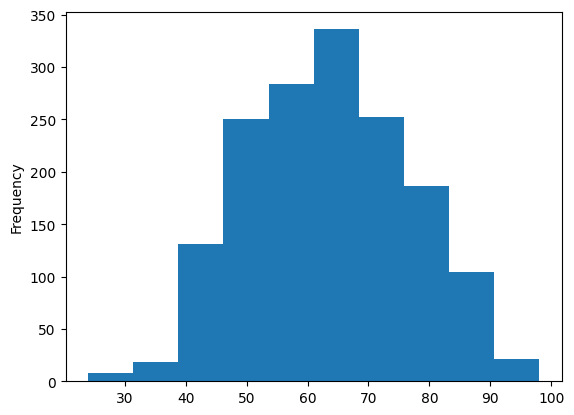

In [159]:
df["age"].plot(kind='hist')


## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

<Axes: xlabel='age', ylabel='networthusbillion'>

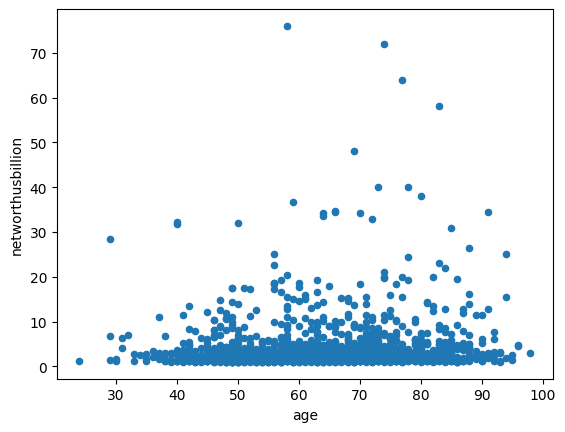

In [166]:
df[["age", "networthusbillion"]].plot(kind = "scatter", x = "age", y = "networthusbillion")



## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

<Axes: ylabel='name'>

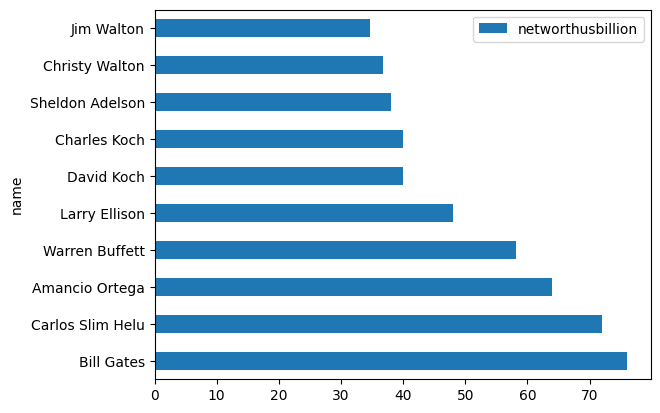

In [173]:
df[["name", "networthusbillion"]].sort_values(by = "networthusbillion", ascending=False).head(10).plot(kind = "barh", x = "name", y="networthusbillion")

## 14) Read in the most recent data

I copied and pasted the most recent data from [the original Bloomberg story](https://www.bloomberg.com/billionaires/) (it's in the page's source code), but it all was saved as JSON. Can you use pandas to read in `billionaires.json`?

> **TIP:** If `pd.read_csv` reads a CSV and `pd.read_excel` reads an excel file... what reads in JSON?
>
> **TIP:** It's a lot less complicated than what we did in class.

In [176]:
pd.read_json("billionaires.json")

,commonName,commonLastName,citizenship,slug,industry,personId,rank,worth,lastChange,lastPercentChange,ytdChange,ytdPercentChange,sector,fWorth,fLastChange,fYtdChange,fLastPercentChange,fYtdPercentChange
0,Elon Musk,Musk,United States,elon-r-musk,Technology,1954518,1,221116780866,9795811154,4.64,84106712938,61.39,Technology,$221B,+$9.80B,+$84.1B,+4.6%,+61.4%
1,Bernard Arnault,Arnault,France,bernard-j-arnault,Consumer,1392853,2,170267873036,7356040557,4.52,8178459368,5.05,Consumer,$170B,+$7.36B,+$8.18B,+4.5%,+5.0%
2,Jeff Bezos,Bezos,United States,jeffrey-p-bezos,Technology,1642252,3,169556171871,3202661603,1.93,62599942079,58.53,Technology,$170B,+$3.20B,+$62.6B,+1.9%,+58.5%
3,Bill Gates,Gates,United States,william-h-gates,Technology,1390479,4,131137012631,1103482475,0.85,21900118029,20.05,Technology,$131B,+$1.10B,+$21.9B,+0.8%,+20.1%
4,Larry Ellison,Ellison,United States,lawrence-j-ellison,Technology,1491757,5,129608081535,2286642464,1.80,37780140594,41.14,Technology,$130B,+$2.29B,+$37.8B,+1.8%,+41.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Sofie Kirk Kristiansen,Kristiansen,Denmark,sofie-kirk-k-kristiansen,Consumer,17992920,496,5145062341,33748968,0.66,-292738682,-5.38,Consumer,$5.15B,+$33.7M,-$293M,+0.7%,-5.4%
496,Frits Goldschmeding,Goldschmeding,Netherlands,frits-j-goldschmeding,Retail,3368283,497,5136282642,154239727,3.10,-7773499,-0.15,Retail,$5.14B,+$154M,-$7.77M,+3.1%,-0.1%
497,Austen Cargill,Cargill,United States,austen-s-cargill,Commodities,1878644,498,5132489050,0,0.00,38448500,0.75,Commodities,$5.13B,$0,+$38.4M,0%,+0.8%
498,John Reece,Reece,United Kingdom,john-reece,Industrial,18070530,499,5125353358,0,0.00,1839914334,56.00,Industrial,$5.13B,$0,+$1.84B,0%,+56.0%
